$$\require{cancel}$$

# Maximum Likelihood Estimation

At the end of this lecture, you will be able to do the following:

- Compute the likelihood of discrete and continuous distributions.

- Interpret the **maximum likelihood estimator** as the objective value of an optimization problem.

- Define and **compute** the maximum likelihood estimator of an unknown parameter.

- **Maximize** a **strictly concave** function in one dimension.

итак чтомы имеем.


Мы искали расстояние между распределениями - распределнеие собранных данных и теоретичским распределением.
Попробовали исопльзовать TV но у нас не получилось создать адекватного оценщика.
Попробовали KLd у которго есть классные свойства, но мы можем создать оценщика - среднее из данных. 
И мы показали что минимизация этого "расстояния", а точнее мы максимизировали функцию правдоподобия.

$$
\begin{align}
L_ n &: \quad E^ n \times \Theta & &\mapsto{\mathbb{R}} \\
& (x_1, \ldots , x_ n, \theta ) & &\mapsto \mathbb{P}_\theta[X_1=x_1, \dots,X_n=x_n]\\
& & & \quad=\prod _{i = 1}^n \mathbb{P}_\theta[X_i=x_i]\\
\text{Bernoulli} &: L(x_1, \ldots , x_ n; p ) & & \quad= p^{\sum_i x_i} (1-p)^{n-\sum_i x_i}\\
\text{Poisson} &: L(x_1, \ldots , x_ n; \lambda ) & & \quad= \frac{\lambda^{\sum_i{x_i}}}{x_1!\cdot x_2!\cdot\,\dots\, \cdot x_n!}e^{-n\lambda}\\
\text{Gaussian} &: L(x_1, \ldots , x_ n; \lambda ) & & \quad=\frac{1}{\sqrt{2\pi\sigma^2}^n}\cdot e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2}\\
\text{Exp} &:L(x_1, \dots,x_n;\lambda) & & \quad=\lambda^n e^{-\lambda \sum x_i}\\
\text{Uni} &:L(x_1, \dots,x_n;b) & & \quad=\frac{1}{b^n}
\end{align}$$


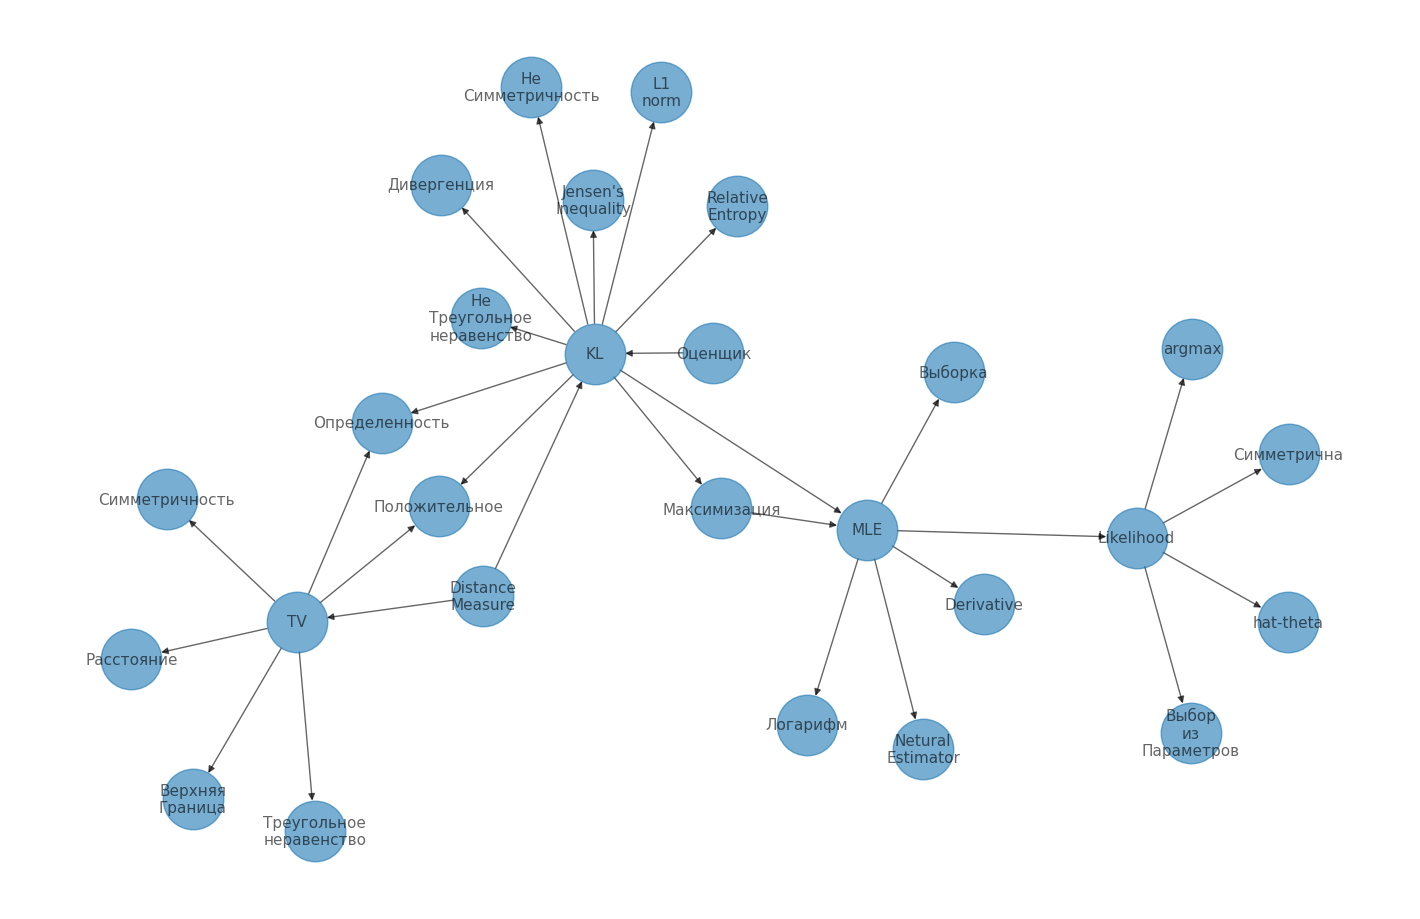

In [1]:
from knowledge import show_graph, showg, load, save, append
d = load('0306')
showg(d, figsize=(14,9), font_size=11)

# Gaussian

 $\mathcal{P}_n=X_1,\dots,X_n\stackrel{iid}{\sim }\mathcal{N}(\mu,\sigma^2), \,  \, f_{\mu,\sigma^2}(x)=\dfrac{1}{\sqrt{2\pi\sigma^2}} e^{-\dfrac{1}{2\sigma^2}(x-\mu)^2}$

выносим константу за умножение 


$\displaystyle\prod _{i = 1}^n f_{\mu, \sigma^2}(x_i)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_1-\mu)^2}\cdot\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_2-\mu)^2}\dots\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_n-\mu)^2}\\
\displaystyle\quad=\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n\cdot e^{-\dfrac{1}{2\sigma^2}(x_1-\mu)^2+(-\dfrac{1}{2\sigma^2}(x_2-\mu)^2)+\dots+(-\dfrac{1}{2\sigma^2}(x_n-\mu)^2)}\\
\displaystyle\quad=\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n\cdot e^{-\frac{1}{2\sigma}((x_1-\mu)^2+(x_2-\mu)^2+\dots+(x_n-\mu)^2}\\
\displaystyle\quad=\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n\cdot e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2}\\
\displaystyle\quad=\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n\cdot e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2}\\
\displaystyle\quad=\frac{1}{\sigma^n(2\pi)^{n/2}}\cdot e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2}$

**Вопрос: Функция правдоподобия - дискретна или не прерывна?**

представим ситуацию дискретную статическая модель $M_1=(\mathbb{Z},\{\mathbf{P}_\theta\}_{\theta\in\mathbb{R}})$ и непрерывную стат. модель  $M_2=(\mathbb{R},\{\mathbf{Q}_\theta\}_{\theta\in\mathbb{R}})$. 

Допустим $p_\theta$ обозначает pmf от $\mathbf{P}_\theta$,  и допустим что $q_\theta$ обозначает pmf от $\mathbf{Q}_\theta$.

Предположм что $p_\theta$ и $q_\theta$ варьируют непрерывно с параметром $\theta$ для каждого фиксированного $x\in E$

Пусть $x_1,\dots,x_n$ есть фиксированные натуральные числа и $y_1,\dots,y_n$ фиксированные реал числа.

Пусть $(L_1)_n$ обозначает правдободобие дискретной модели $M_1$\
Пусть $(L_2)_n$ обозначает правдободобие дискретной модели $M_2$

Оставляя $x_1,\dots,x_n$ и $y_1,\dots,y_n$ не изменными, давайте подумаем об $(L_1)_n(x_1,\dots,x_n,\theta)$ и $(L_2)_n(y_1,\dots,y_n,\theta)$ как функции от $\theta$

**Вопрос**
правда ли что  $\theta \mapsto (L_1)_ n(x_1, \ldots , x_ n, \theta )$ это непрерывная функция от $\theta$?\
**Ответ**\
Да правда потому что не зависимо от $\theta \in \mathbb {R}$ функция всегда вернет значние для прадоподобия, потому что природа данных и природа параметре модели вероятности разные. и в нашей модели мы обозначаем что данные  $\theta\in\mathbb{R}$ принадлежит непрерывным числам.
Помимо этого $p_\theta$ и $q_\theta$ являются непрерывными. 
А сама функция правдоподобия - это произведение вероятностей, которые тоже дают непрерывные значения.

$$(L_1)_ n(x_1, \ldots , x_ n, \theta ) = \prod _{i = 1}^ n p_\theta (x_ i), \quad (L_2)_ n(y_1, \ldots , y_ n, \theta ) = \prod _{i = 1}^ n q_\theta (y_ i).$$

**Вопрос**
правда ли что  $\theta \mapsto (L_2)_ n(x_1, \ldots , x_ n, \theta )$ это непрерывная функция от $\theta$?\
**Ответ** тоже ДА потому что сами числа X мы не рассматриваем. сама функция правдоподобия это перемножение непрерывных чисел, и это дает непрерывные числа.
$$L(x_1, \ldots , x_ n, p) = \prod _{i = 1}^ n p^{x_ i}(1 - p)^{1 - x_ i} = p^{\sum _{i = 1}^ n x_ i} (1 -p)^{n - \sum _{i = 1}^ n x_ i}.$$
мы видим что функция варирует непрерывно как функция параметра $p$. Это также верно и для других дисвретных моделей (Пуассон например)

In [2]:
if not 'd' in locals():
    d = {}

In [3]:
append(d, 'Likelihood', 'Непрерывная')

### Вопрос  Likelihood of a Gaussian Statistical Model

Допустим что $X_1,\dots,X_n\stackrel{iid}{\sim }\mathcal{N}(\mu^*,(\sigma^*)^2)$ для не известной $\mu^*\in\mathbb{R},(\sigma^*)^2>0.$

мы построим ассоциированную стат моедль. $\displaystyle \left(\mathbb {R}, \{ N(\mu , \sigma ^2)\} _{(\mu , \sigma ^2) \in \mathbb {R} \times (0, \infty )}\right)$


функция правдоподобия можно записать как 

$L_ n\left(x_1, \ldots , x_ n, (\mu , \sigma ^2)\right) = \frac{1}{(\sigma \sqrt{2 \pi })^ C} \exp \left(-\frac{1}{A} \sum _{i = 1}^ C B_ i\right)$

Где $A$ зависит от $\sigma$, $B_i$ зависит от $\mu$ и $x_i$

Найти $A$, $B_i$ и $C$


$$L_ n(x_1, \ldots , x_ n, (\mu , \sigma ^2)) = \prod _{i =1}^ n \frac{1}{\sqrt{2 \pi } \sigma } \exp \left(-\frac{1}{2 \sigma ^2} (x_ i - \mu )^2\right) =\\ \frac{1}{(\sigma \sqrt{2 \pi })^ n} \exp \left(-\frac{1}{2 \sigma ^2} \sum _{i = 1}^ n (x_ i - \mu )^2\right).$$
следовательно:\
$A=2\sigma^2$\
$B=(x_i-\mu)^2$\
$C=n$

### Вопрос  Likelihood of an Exponential Distribution

Допустим что $X_1,\dots,X_n\stackrel{iid}{\sim }\text{Exp}(\lambda)$ для не известной $\lambda\in(,\infty)$

мы построим ассоциированную стат моедль. $\left(E, (\mathbb {P}_\theta)_{\theta\in\Theta}\right)$

где $E=(0, \infty)$\
где $\Theta =(0, \infty)$


$f(x;\lambda)=\lambda e^{-\lambda x},\, x>0,$
$L(x_1, \dots,x_n;\lambda)\in \mathbb{R}^n,\forall \lambda >0$

$L(x_1, \dots,x_n;\lambda)=\lambda e^{-\lambda x_1}\cdot,\dots,\cdot\lambda e^{-\lambda x_n}$

$\quad\quad=\prod_{i=1}^n\lambda e^{-\lambda x}\prod_{i=1}^n\mathbb{1}(x_i>0)$

$\quad\quad=\lambda^n e^{-\lambda \sum x_i}\prod_{i=1}^n\mathbb{1}(x_i>0)$

выражение произведения индикаторной переменной можно заменить на то что минимальное x_i больше 0. 
Обычно когда есть много индикаторных переменных, то лучше всего избавиться от них если через min или max.

$\mathbb{1}(\min x_i>0)$

**Вопрос нужно ли записывать этот индикатор в финальную формулу likelihood ?**

**НЕТ** потому что он не зависит от $\lambda$, если бы у нас был $\lambda$ то тогда мы бы точно должны были ее добавить.\
 Но почему же нам на самом деле не нужно ее там дописывать? Да потому что наши **данные** - это уже полученные данных из Exp распределение, они **уже соотв требованию быть больше нуля**. Наша модель wellspecified - а значит мы точно знаем что наши данные пришли из реализации Epx распределения, и обладают нужными харатеристиками.
 
$L(x_1, \dots,x_n;\lambda)=\lambda^n e^{-\lambda \sum x_i}$


**Задача** Переписать произведение $\displaystyle \mathbf{1}(x_1\leq 5)\mathbf{1}(x_2\leq 5)$ как один индикатор. Найти функцию $f(x_1,x_2)$ которая будет соотв уравнения\
$$ \mathbf{1}(x_1\leq 5)\mathbf{1}(x_2\leq 5)=\mathbf{1}(f(x_1,x_2)\leq 5).$$

$f(x_1,x_2) =\max \left(x_1,x_2\right)$

In [4]:
append(d, 'Indicator function', 'min-max trick')

### Вопрос Likelihood of an Uniform Distribution

Допустим что $X_1,\dots,X_n\stackrel{iid}{\sim }\text{Unif}[0,b]$ для не известной $b>0$

мы построим ассоциированную стат моедль. $\left(E, (\mathbb {P}_\theta)_{\theta\in\Theta}\right)$

где $E=[0, \infty)$ хотя козалось бы, что мы хотим установить там  $b$ вместо $\infty$ почему же мы этого не делаем. Дело в том, что мы хотим чтобы $E$ было **наименьшей возможной выборкой**, но мы не знаем чему именно равно $b$, его еще не существует, его просто нет, это какая-то переменная, которая положительна и все. А раз нам нужно указать предельное значение домен $E$ нам придется указать  $\infty$\
где $\Theta =[0, \infty)$

$f(x)=\frac{1}{b} \mathbb{1}(0\le x \le b)$


$L(x_1, \dots,x_n;b)=\frac{1}{b}\mathbb{1}(0\le x_1 \le b)\dots\frac{1}{b}\mathbb{1}(0\le x_n \le b)$

$L(x_1, \dots,x_n;b)=\frac{1}{b^n}(\mathbb{1}(0\le x_1 \le b)\cdot\dots\cdot\mathbb{1}(0\le x_n \le b))$

$L(x_1, \dots,x_n;b)=\frac{1}{b^n}\prod_{i=1}^n\mathbb{1}(0\le x_i \le b)$


Попробуем что-то сделать с этой индикаторной фукцией. Нам нужно придумать что-то с mix max.

$\quad=\mathbb{1}\min(x \ge 0)\mathbb{1}\max(x\le b)$

И опять же, раз наши данные приши из wellspecified модели - это значит что наши наблюдения и так соотв нужным параметрам.



$L(x_1, \dots,x_n;b)=\frac{1}{b^n}$



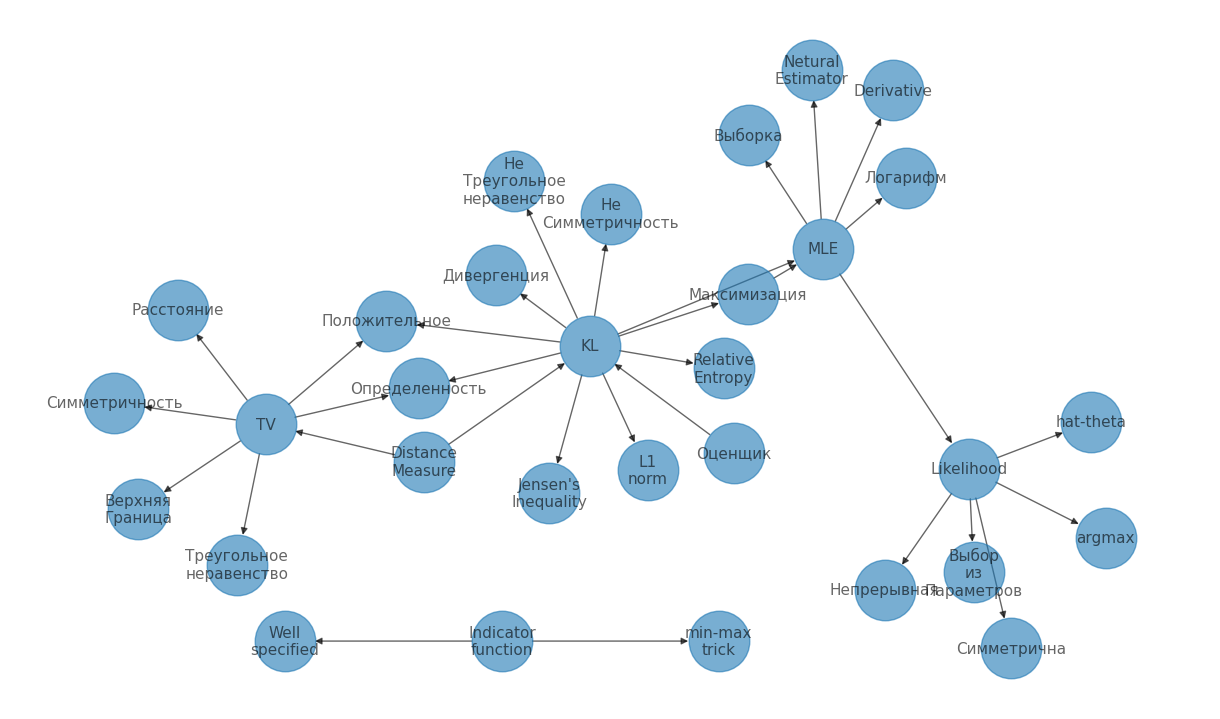

In [5]:
append(d, 'Indicator function', 'Well specified')
showg(d)

### Вопрос Likelihood of a Mixture of Gaussians

Допустим у нас есть смесь друх Гаус перменных $\mathcal{N}(\mu_1,1), \mathcal{N}(\mu_2,1)$

Определим веса каждого компонента нашей модели - $[\frac{1}{2},\frac{1}{2}]$

Есть несколько способов описать модели - через pdf и умножить каждую Гаусову переменну на ее вес.

$f(x)=\dfrac{1}{\sqrt{2\pi}}\left[ {\color{red}{\dfrac{1}{2}}} e^{-\dfrac{1}{2}(x-\mu)^2}+ {\color{red}{\dfrac{1}{2}}}e^{-\dfrac{1}{2}(x-\mu)^2}\right]$\
вынесем общий множетель\
$\quad={\color{red}{\dfrac{1}{2}}} \dfrac{1}{\sqrt{2\pi}}\left[ e^{-\dfrac{1}{2}(x-\mu)^2}+ e^{-\dfrac{1}{2}(x-\mu)^2}\right]$\
перенесем двойку под дробь

$\quad= \dfrac{1}{{\color{red}{2}}\sqrt{2\pi}}\left[ e^{-\dfrac{1}{2}(x-\mu)^2}+ e^{-\dfrac{1}{2}(x-\mu)^2}\right]$

Есть вариант попроще, который опишет как мы будет делать выборку. sample from distribution.

$Z\sim\text{Ber}(\pi)$ - это латентная переменная (скрытая)
так как пемерене $Z$ и $X$ независимы

$X_1\sim\mathcal{N}(\mu_1,1), X_2\sim \mathcal{N}(\mu_2,1)$

$X = Z\cdot X_1+(1-Z)\cdot X_2$

А еще можно обозначить переменную $X=X_1^z\cdot X_2^{1-Z}$

Найдем функцию правдоподобия

$L(x_1,\dots,x_n; m1, m2) = \prod_{i=1}^nf(x_i)=$

$\quad=\prod_{i=1}^n\dfrac{1}{{\color{red}{2}}\sqrt{2\pi}}\left[ e^{-\dfrac{1}{2}(x-\mu)^2}+ e^{-\dfrac{1}{2}(x-\mu)^2}\right]$

Тут мало что можно сделать относительно упращение выражения. мы можем только вынести 
регуляразационную константу за пределы произведения

$\quad=\dfrac{1}{{\color{red}{2}}\sqrt{2\pi}}\prod_{i=1}^n\left[ e^{-\dfrac{1}{2}(x-\mu)^2}+ e^{-\dfrac{1}{2}(x-\mu)^2}\right]$

Мы не можем больше ничего тут упростить.

Вопрос - как бы выглядила модель со всеми параметрами?

$L_ n(x_1, \ldots , x_ n; \mu _1, \mu _2, \sigma _1^2, \sigma _2^2, \pi ^*)=\prod _{i=1}^ n\frac{1}{\sqrt{2\pi }}\left[\frac{ \pi ^*}{\sigma _1}\exp \left(-\frac{(x_ i-\mu _1)^2}{2\sigma _1^2}\right)+\frac{1-\pi ^*}{\sigma _2}\exp \left(-\frac{(x_ i-\mu _2)^2}{2\sigma _2^2}\right)\right]$

# Maximum Likelihood Estimator

Введем понятие аргумента и минимума значение функции.

$f(x)$ где X это аргумент функции f. \
$\text{argmin} f(x)$ = это такое значение/значение аргумента $x$ при котором функция $f$ принимает минимальнеое значение.

Мы можем ввести подмножество $S$ и ограничить его доменом функции $f$, и через обозначение $\text{argmin}_{x\in S}f(x)=\max_xf(x)$ такие значения $x\in S$  при которых функцию $f$ минимальная на подмножестве $S$

все тоже самое валидно для идеи $\text{argmax}$

Итак мы написали кучу функций правдоподобия, а теперь мы хотим их использовать чтобы вычислить Оценщик. 

И мы помним что идея минимизации $\text{KL}$ это тоже самое что максимизация правдопобоия (доказали ранее). то есть ранее мы написали кучу функций разных переменных, и теперь нам нужно их максимизировать в соотв. с параметрами которые присущи этим распределениям.


Допустим $X_1, \ldots , X_ n \stackrel{iid}{\sim } \mathbf{P}_{\theta ^*}$ это выборка из модели 
$(E, \{ \mathbf{P}_\theta \} _{\theta \in \mathbb {R}})$ где $\mathbf{P}_\theta$ это pmf $p_\theta$.

Мы наблюдаем выборку $X_1=x_1,\dots,X_n=x_n$. Тогда MLE для $\theta^*$ определяется как 

$$\hat{\theta} _ n^{MLE} = \text {argmax}_{\theta \in \mathbb {R}} \left( \prod _{i = 1}^ n p_\theta (X_ i) \right).$$

Ввиду того, что правдоподобие это положительная функция, и она непрерывна, то тогда максимизация $L$ тожесамое что максимизация Логарифма от $L$. логарифм - тоже нерерывно возрастающая функция для положительных значений

$$\hat{\theta _ n}^{MLE} = \text {argmax}_{\theta \in \mathbb {R}} \log(L(X_1,\dots,X_n))$$

Мы выбрали логарифм а могли еще и взять експоненты. мы его выбрали для того чтобы избавляться от степеней и экспонент.

К примеру когда мы минимизировали $\text{KL}$ мы решил максимизировать логарифм $-\text{KL}$  потому что это было удобно для сокращений, а потом мы просто убрали логарифм


**ОЧЕНЬ ВАЖНО ПОНИМАТЬ START!**

Когда мы говорили о PDF и PMF - это значит что мы работали с фиксированными парметрами распределения $\mu,\lambda,\sigma,\alpha,b$ и наши данные X были перменными.

Когда мы говорим о Log Likelihood мы "перепригиваем на 180 градусов" и теперь наши данные ФИКСИРОВАНЫ а параметры распределения - становняться переменными. Это Функция от параметров функции.\

**ОЧЕНЬ ВАЖНО ПОНИМАТЬ END!**

MLE был введен Фишеров в начале 20 века

In [6]:
append(d, 'Логарифм',  ["Убрает Экспоненты", "Убирает Степени"])
append(d, 'Likelihood', ['Данные Это Константа', 'Параметры это Переменные'])

**Вопрос** - какие интерпретации MLE корректны когда применяем их к какой либо выборке

1) *Значение $\theta$ которая максимизирует вероятность $P_\theta$ на данных наблюдений $(x_1,\dots,x_n)$* - **верно**, потому что likelihood это joint density из $n$ iid сэмплов из $P_\theta$
$$\mathbf{P}_\theta [X_1 = x_1, \ldots , X_ n = x_ n] = L_ n(x_1, \ldots , x_ n, \theta ).$$
Следовательно MLE находит $\hat\theta$ который максимизирует вероятность что $x_1,\dots,x_n$ были выбраны из $\displaystyle P_{\hat\theta_n}$
2) *Значение $\theta$ которое минимизирует оценщик $\text{KL}$ дивергенции между $P_\theta$ и истенной $P_\theta^*$* - **верно**, именно так и был выведен MLE - из дивергенции KL. 
3) *$\theta^*$ это истинны параметр* - **не верно**. MLE это оценщик - он строится из конечной выборки  и мы не можем надеется что он в точности восстановить истенный параметр. С поправкой на то что MLE это **weakly consistent estimator** для $\theta^*$, что значит что MLE сойдется к $\theta^*$ в вероятности в этих условия. Одна существуют примеры стат. моделей где MLE **не** сойдется к истинному параметру.

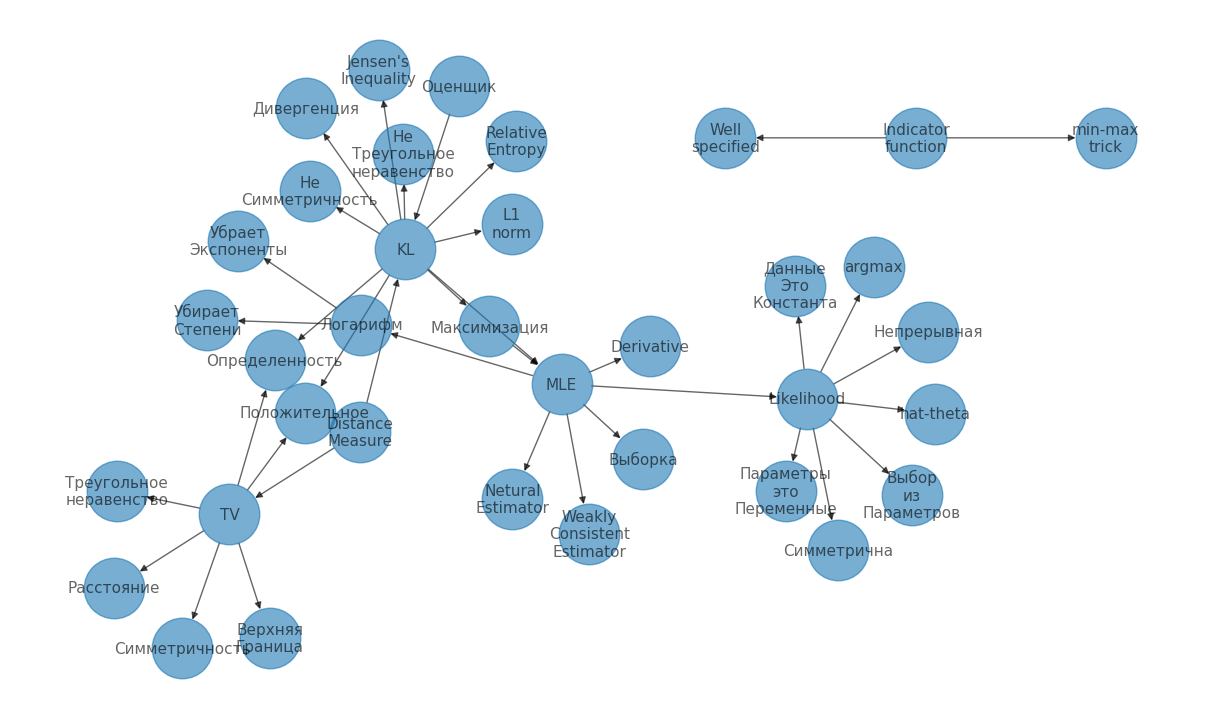

In [7]:
append(d, 'MLE', 'Weakly Consistent Estimator')
showg(d)

# Interlude: Minimizing and Maximizing Functions

максимизация или минимизация это процесс **оптимизации**, который важен для ML, как мы делали это для $\hat{\textsf{KL}}$ 

$$\min_{\theta\in \Theta}-h(\theta) \Leftrightarrow \max_{\theta\in \Theta}h(\theta)$$


Проблема в том что L это функция полиномиальная. 

**график полиномиальной функции**

и ее очень сложно минимизировать, мы можем найти локальный минимум, и сложно найти глобальный минимум.


Идеальный варианта - это когда производная равная 0. но в полиномиальной фукнции - таких мест очень много.

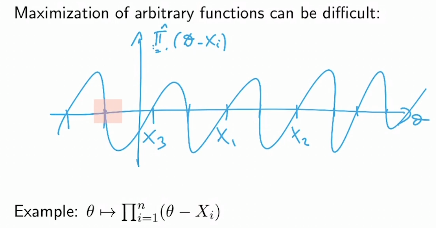

Тогда люди придумывают алгоритмы, которые тоже локальные - **Градиентный Спуск (GD).**

Поэтому нам важно предпологать форму функциии, какой будет форма чтобы мы знали ее поведение на графике, и соотв могли верно выбрать способ поиска глобального минимума.

**В рамках этого курса мы будем концентрироваться на Convex вогнутая - minimization, Concave выпуклая - maximization.**

In [8]:
append(d, 'Likelihood', 'Полином')
append(d, 'Likelihood', 'Предположение Формы')
append(d, 'Максимизация', 'Оптимизация')
append(d, 'Оптимизация', ['GD','Adam'])

## Convec Выпуклый and Concave вогнутый

функция выпуклая если ее вторая производная негативная

это что значит, это значит что ее производная уменьшаяется. то есть скорость роста - падает.

$h''(\theta), \forall \theta \in \Theta$


Выпуклая если и только если $g''(x)\le0 \forall x \in I;$\
Строго Выпуклая если и только если $g''(x)<0 \forall x \in I;$\
Вогнутая если и только если $g''(x)\ge0 \forall x \in I;$\
Строго Вогнутая если и только если $g''(x)>0 \forall x \in I;$

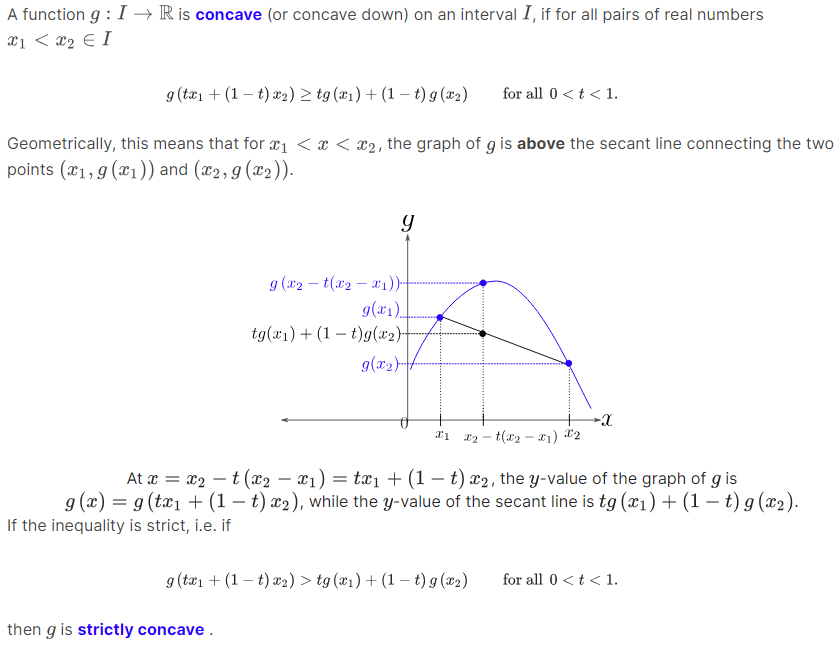

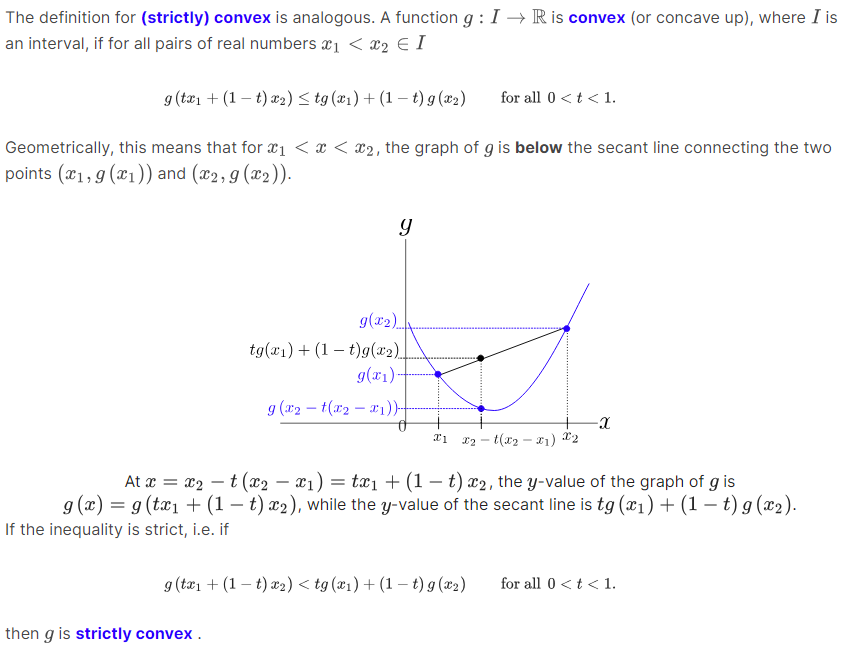

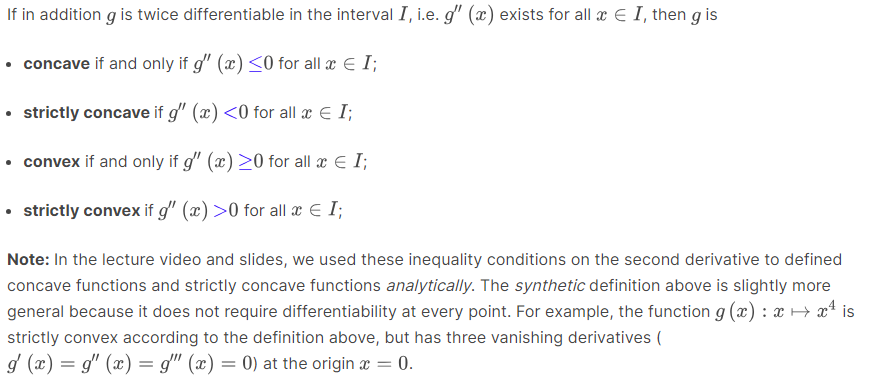

In [9]:
append(d, 'Максимизация', '(Strickly) Concave')
append(d, '(Strickly) Concave', 'h"(x)<0')

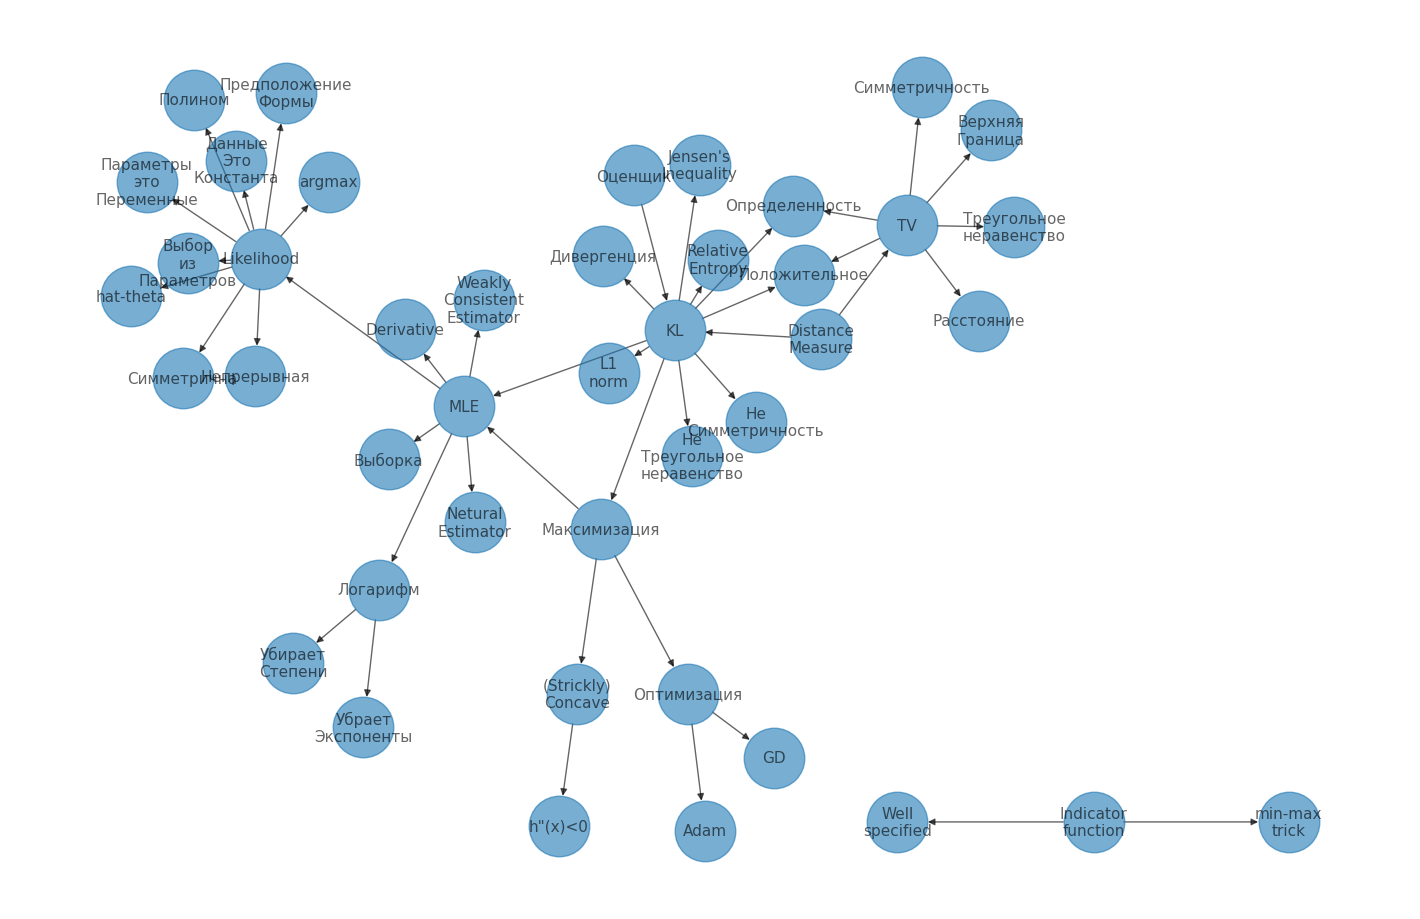

In [10]:
showg(d,figsize=(14,9))

## 8. Worked examples: Concavity in 1 dimension


Функция дважды дифферетцируема $h:\Theta\subset \mathcal{R}\to\mathcal{R}$ является **Concave вогнутой если ее вторая производная Отрицательная:**

$h''(\theta)\leq0, \forall \theta \in \Theta$

Негативная производная это значит что производная уменьшается.

$$\begin{align}
\Theta&=\mathbb{R},  &h(\theta)&=-\theta^2,    & h'(\theta)&=-2\theta,  &  h''(\theta)              &=-2&<0 \text{ (s.concave)}\\
\Theta&=(0, \infty), &h(\theta)&=\sqrt{\theta},& h'(\theta)&=\frac{1}{2\sqrt{\theta}}, & h''(\theta)&=-\frac{1}{4\theta^{3/2}},&<0 \text{ (s.concave)}\\
\Theta&=(0, \infty), &h(\theta)&=\log\theta,   & h'(\theta)&=1/\theta,  & h''(\theta)  &=-\frac{1}{\theta^2}&<0 \text{ (s.concave)}\\
\Theta&=[0, \pi],    &h(\theta)&=\sin\theta,   & h'(\theta)&=cos\theta, &  h''(\theta) &=-sin(\theta)&<0 \text{ (s.concave)}\\
\Theta&=\mathbb{R},  &h(\theta)&=2\theta-3,    & h'(\theta)&=2,         &  h''(\theta)&=0
&\begin{cases}
<0 \\
\ge0
\end{cases}
\text{Both}\\
\end{align}$$

## 9. Strictly Concave Functions and Unique Maximizer


Нам важна форма этих функций потому что они имеют один максимум минимум, когда производная равная 0.

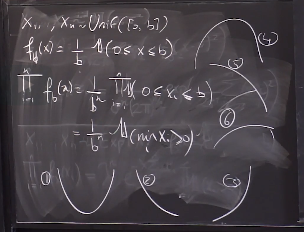

Нам нужно сфокусироваться на номере **1** и **4** потому что их максимум/минимум достежим в одной лишь точке. Оказавшись на этой линии и зная ее форму, мы взяв производную сруз можем понять в какую сторону нужно двигаться к глобальному минимуму/максимуму

Если производная положительная - то минимум находиться с лево. Если производная отрицательна - то минимум справо. тоесть **локальная информация трансформируется в глобальную информацию**

Первое условия - $$h'(\theta)=0$$

В многопараметрических условиях у нас **нет информации о производной**, мы используем Градиент 
$$\bigtriangledown h(\theta)=0 \in \mathbb{R}^d$$


**в этой лекции мы будет фокусироваться на производной равно нуле**

$h(\theta)=-\theta^2$\
$h'(\theta)=-2\theta$

приравняем производную к нулю\
$\text{argmax}_\theta(h)=0 \Rightarrow (h'(\theta)=-2\theta=0 =>$\
$-2\theta=0$\
$\theta=0$

In [11]:
append(d, '(Strickly) Concave', 'Local is Global')
append(d, '(Strickly) Concave', 'Gradient R^d')

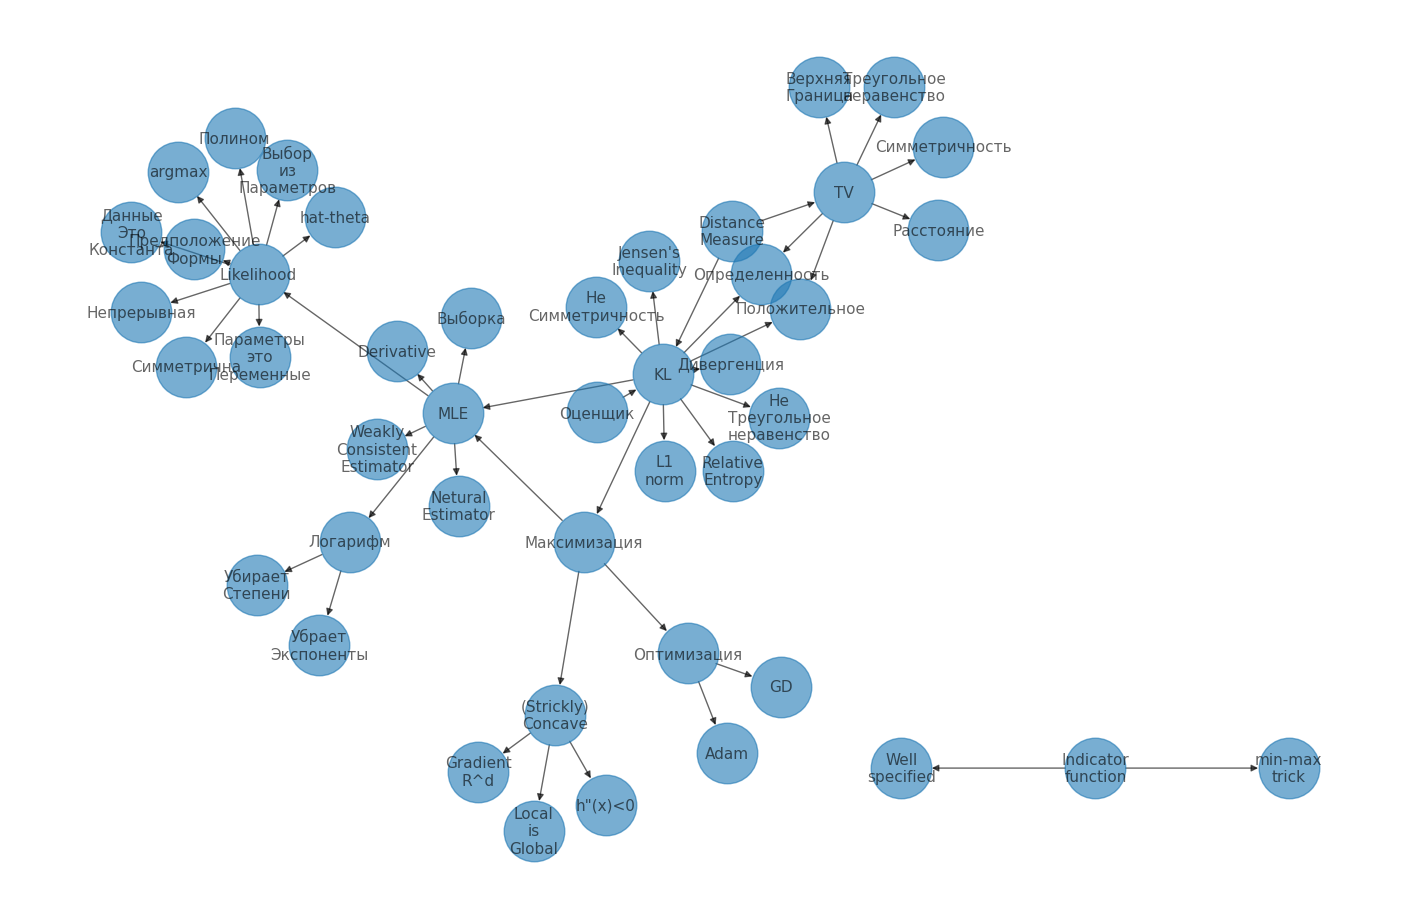

In [12]:
showg(d,figsize=(14,9))

In [13]:
import json
with open('kg/0307.json', 'w') as fp:
    json.dump(d, fp, ensure_ascii=False, indent='\t')

# Вопросы

- Что такое функция правдоподобия и как она связана с оценкой параметров вероятностных моделей?
- Как связаны KL-дивергенция и функция максимального правдоподобия?
- Чем отличается подход оценки параметров с использованием KL-дивергенции от использования функции правдоподобия?
- Приведите формулу правдоподобия для независимых и одинаково распределённых (IID) случайных переменных.
- Как изменится функция правдоподобия, если данные распределены по закону Бернулли? Опишите процесс вывода этой функции.
- Опишите, как можно вывести функцию правдоподобия для Пуассоновского распределения.
- Как выглядит функция правдоподобия для непрерывных случайных переменных и как она отличается от дискретного случая?
- Что представляет собой гауссовское правдоподобие и какие параметры в нём важны?
- Как можно вычислить оценщик максимального правдоподобия для экспоненциального распределения?
- Что такое индикаторная функция и как она используется при вычислении правдоподобия?
- Как функции max и min используются при формулировке условий в моделях максимального правдоподобия?
- Что такое оптимизация в контексте вычисления максимального правдоподобия и какие методы оптимизации наиболее распространены?
- Как применяется понятие конвексности и вогнутости в задачах на максимизацию функции правдоподобия?
- Объясните, почему логарифмирование правдоподобия может упростить задачу его максимизации.
- Каковы потенциальные проблемы или ограничения при использовании метода максимального правдоподобия?
- Каковы основные предположения модели, при которых применяется метод максимального правдоподобия?
- Почему важно, чтобы данные были независимы и одинаково распределены при использовании максимального правдоподобия?
- Как влияет размер выборки на точность оценки максимального правдоподобия?
- Можно ли использовать максимальное правдоподобие для оценки параметров, если данные содержат выбросы? Как это повлияет на оценки?
- Как проверить адекватность модели, построенной с использованием метода максимального правдоподобия?
- Чему равен MLE для параметра p биномиального распределения, и как его можно найти?
- Какие численные методы могут использоваться для максимизации правдоподобия, когда аналитическое решение недоступно?
- Объясните, как метод максимального правдоподобия связан с байесовскими методами оценки.
- В чем заключается разница между точечной и интервальной оценкой в контексте максимального правдоподобия?
- Какие проблемы могут возникнуть при максимизации логарифмического правдоподобия и как их можно решить?
- Какие критерии информации (например, AIC или BIC) используются для сравнения моделей, оцененных с помощью MLE?
- Какие теоретические свойства (например, смещение, состоятельность, эффективность) характеризуют хороший оценщик максимального правдоподобия?
- Какие условия должны быть выполнены, чтобы максимальное правдоподобие было асимптотически нормальным?
- Какие ограничения или предпосылки у модели необходимо проверять перед применением MLE?
- Может ли MLE быть использован для оценки параметров сложных моделей, таких как смешанные или иерархические модели?

# Вопрос Find the Minimizer I

для каждой функции найти минимайзер f
f(x)=x^2

argmax_x(f)=0

f'(x)=2x,
2x=0
x=0



2) 
f(x)=(x-.5)^4

argmax_x(f)=0
f'(x)=4(x-.5)=4x-2

4x-2=0
4x=2
x=2/4
x=1/2

3) f(x)=ln(e^x+e^{-2x))

argmax_x(f)=0;

f'(x)=len(e^x)


In [14]:
import numpy as np

In [15]:
1/(4*4)

0.0625

In [16]:
4**(-2)

0.0625

In [17]:
np.log(-1)

/tmp/ipykernel_21212/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

https://www.overleaf.com/learn/latex/Aligning_equations_with_amsmath